# Produce figure 2

### Zoïs Moitier (2021)
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Rectangle

import Analytic

In [2]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave
M = 15  # 2M+1 number of mode in the analytic sum

In [3]:
## Ellipse parameters
ε = 1e-2

## Internal plotting function

In [4]:
def grid_2d(H, N):
    h = np.linspace(-H, H, num=N)
    x, y = np.meshgrid(h, h)
    return (x, y)

In [5]:
def one_plot(fig, ax, x, y, u, cmap, clim, artist, title):
    im = ax.pcolormesh(
        x, y, u, shading="gouraud", cmap=cmap, vmin=clim[0], vmax=clim[1]
    )

    ax.add_artist(artist())
    fig.colorbar(im, ax=ax)
    ax.set_aspect("equal", "box")
    ax.set_title(title, fontsize=15)

    return None

In [6]:
def four_plots(x, y, u, artist, title):
    fig_size = [1.5 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fig_size, constrained_layout=True)

    ur_max = np.abs(np.real(u)).max()
    one_plot(
        fig,
        ax[0, 0],
        x,
        y,
        np.real(u),
        "RdBu_r",
        (-ur_max, ur_max),
        artist,
        "Real part",
    )

    ui_max = np.abs(np.imag(u)).max()
    one_plot(
        fig,
        ax[0, 1],
        x,
        y,
        np.imag(u),
        "RdBu_r",
        (-ui_max, ui_max),
        artist,
        "Imaginary part",
    )

    u_max = np.abs(u).max()
    one_plot(fig, ax[1, 0], x, y, np.abs(u), "viridis", (0, u_max), artist, "Modulus")

    one_plot(
        fig,
        ax[1, 1],
        x,
        y,
        np.angle(u),
        "twilight_shifted_r",
        (-np.pi, np.pi),
        artist,
        "Argument",
        )
        
    return None

In [7]:
def plot_field(H, type_field):
    c, ξ0 = Analytic.ellipse_param(1, ε)
    in_field = Analytic.field_plane_wave(α, k, c, M)

    N = 128
    x, y = grid_2d(H, N)

    ξ, η = Analytic.to_elliptic(c, x, y)
    ind_ext = np.where(np.greater_equal(ξ, ξ0))

    if type_field.startswith("in"):
        u = Analytic.eval_field(in_field, ξ, η)

        artist = lambda: Rectangle((-5, -5), 10, 10, fill=False, ec="k", lw=1)
        title = "Incident field"

    if type_field.startswith("sc"):
        sc_field = Analytic.solve_field(in_field, ξ0, 1)
        u = np.zeros_like(ξ, dtype=complex)
        u[ind_ext] = Analytic.eval_field(sc_field, ξ[ind_ext], η[ind_ext])

        artist = lambda: Ellipse((0, 0), 2 * ε, 2, fc=(0.75, 0.75, 0.75), ec="k", lw=1)
        title = "Scattered field"

    if type_field.startswith("tt"):
        sc_field = Analytic.solve_field(in_field, ξ0, 1)
        u = np.zeros_like(ξ, dtype=complex)
        u[ind_ext] = Analytic.eval_field(
            sc_field, ξ[ind_ext], η[ind_ext]
        ) + Analytic.eval_field(in_field, ξ[ind_ext], η[ind_ext])

        artist = lambda: Ellipse((0, 0), 2 * ε, 2, fc=(0.75, 0.75, 0.75), ec="k", lw=1)
        title = "Total field"

    four_plots(x, y, u, artist, title)

    return None

## Plot of the incident field

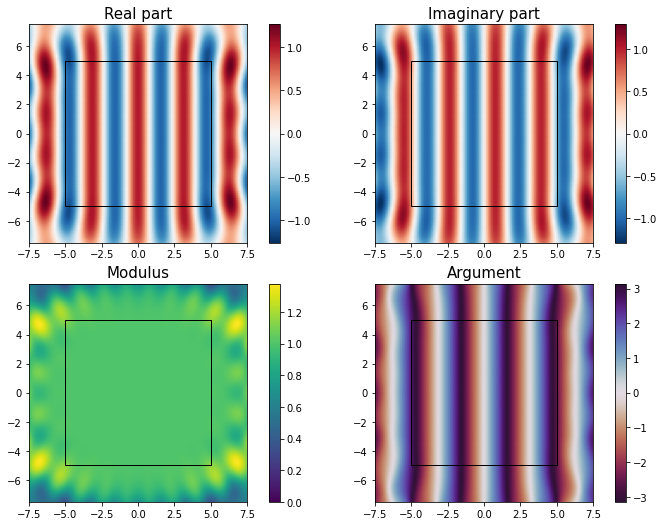

In [8]:
plot_field(7.5, "in")

## Plot of the total field

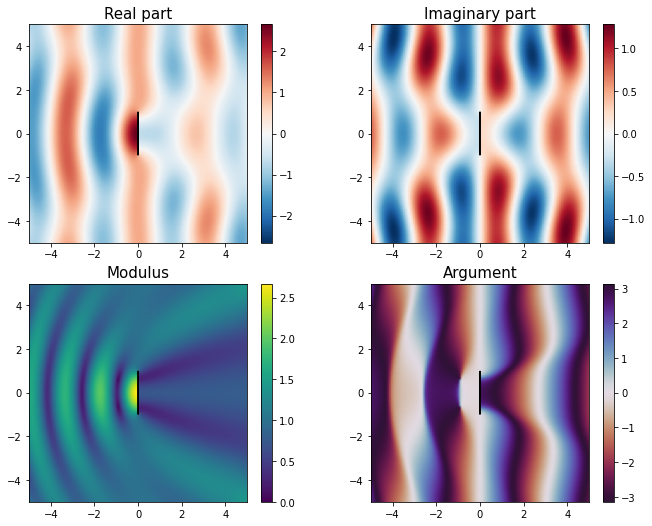

In [9]:
plot_field(5, "tt")

## Plot of the scattered field

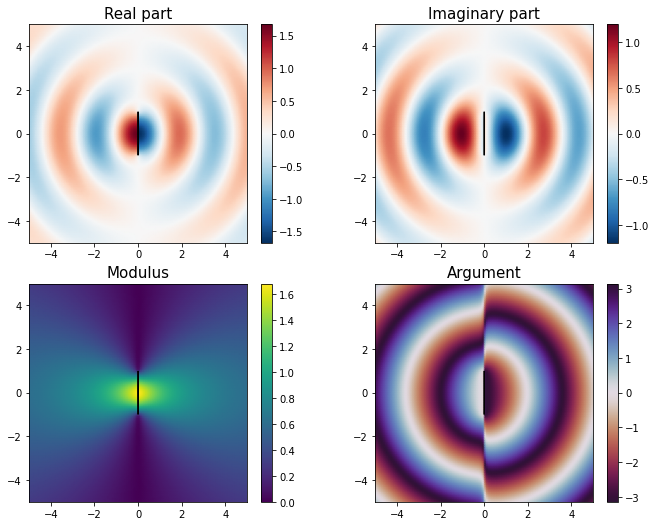

In [10]:
plot_field(5, "sc")